In [10]:
import sys 
import cv2
import os 
import time
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
from ultralytics import YOLO
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [15]:
from split import split_dataset
from mask2box import create_annotations_with_masks

In [16]:
images_directory = './data/images'
masks_directory = './data/masks'
source_dir = "./data/images"

In [4]:
create_annotations_with_masks(images_directory=images_directory, masks_directory=masks_directory)


In [10]:
split_dataset(
    source_dir=source_dir,
    train_images_dir='./data/train/images',
    train_labels_dir='./data/train/labels',
    val_images_dir='./data/val/images',
    val_labels_dir='./data/val/labels',
    split_ratio=0.8, 
    )

Folder "fish_03" has more than 500 images.
Folder "fish_04" has more than 500 images.
Folder "fish_05" has more than 500 images.
Folder "fish_02" has more than 500 images.
Folder "fish_01" has more than 500 images.
Dataset split completed with a maximum of 500 images per class!


In [3]:
model = YOLO('yolov8n')
model.train(data='./yolo.yaml', epochs=25, batch=16, imgsz=320)
print('Training Compl   eted')

Ultralytics 8.3.18 🚀 Python-3.12.4 torch-2.5.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./yolo.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torc

train: Scanning /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/train/labels.cache... 7203 images, 0 backgrounds, 3502 corrupt: 100%|██████████| 7203/7203 [00:00<?, ?it/s]

train: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/train/images/01465f8f61db58564cd37ce2dfc519c5#201106090830_0_frame0.jpeg: ignoring corrupt image/label: labels require 5 columns, 1 columns detected
train: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/train/images/01465f8f61db58564cd37ce2dfc519c5#201106090830_0_frame103.jpeg: ignoring corrupt image/label: labels require 5 columns, 1 columns detected
train: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/train/images/01465f8f61db58564cd37ce2dfc519c5#201106090830_0_frame104.jpeg: ignoring corrupt image/label: labels require 5 columns, 1 columns detected
train: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/train/images/01465f8f61db58564cd37ce2dfc519c5#201106090830_0_frame105.jpeg: ignoring corrupt image/label: labels require 5 columns, 1 columns detected
train: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/datase


val: Scanning /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/val/labels.cache... 1801 images, 0 backgrounds, 852 corrupt: 100%|██████████| 1801/1801 [00:00<?, ?it/s]

val: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/val/images/01465f8f61db58564cd37ce2dfc519c5#201106090830_0_frame1.jpeg: ignoring corrupt image/label: labels require 5 columns, 1 columns detected
val: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/val/images/01465f8f61db58564cd37ce2dfc519c5#201106090830_0_frame102.jpeg: ignoring corrupt image/label: labels require 5 columns, 1 columns detected
val: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/val/images/01465f8f61db58564cd37ce2dfc519c5#201106090830_0_frame107.jpeg: ignoring corrupt image/label: labels require 5 columns, 1 columns detected
val: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/val/images/01465f8f61db58564cd37ce2dfc519c5#201106090830_0_frame189.jpeg: ignoring corrupt image/label: labels require 5 columns, 1 columns detected
val: WARNING ⚠️ /Users/harish/Documents/IIITDMK/Design Project/Models/dataset/val/images/01465

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.475      3.206      1.079         12        320: 100%|██████████| 232/232 [16:10<00:00,  4.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]

                   all        949       1585      0.603      0.376      0.361      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G       1.36      1.767      1.029         11        320: 100%|██████████| 232/232 [12:22<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]

                   all        949       1585      0.553       0.59      0.569      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.282      1.457      1.013         28        320: 100%|██████████| 232/232 [11:51<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]

                   all        949       1585      0.717       0.63      0.684      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.265      1.321      1.008         17        320: 100%|██████████| 232/232 [15:02<00:00,  3.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:25<00:00,  2.85s/it]

                   all        949       1585      0.867      0.655      0.762      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      1.229      1.194     0.9932         11        320: 100%|██████████| 232/232 [16:34<00:00,  4.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:25<00:00,  2.84s/it]

                   all        949       1585      0.852      0.652       0.76      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      1.205      1.114     0.9868         12        320: 100%|██████████| 232/232 [16:01<00:00,  4.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:21<00:00,  2.72s/it]

                   all        949       1585      0.798      0.761      0.822       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      1.187      1.042     0.9784         13        320: 100%|██████████| 232/232 [15:48<00:00,  4.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:21<00:00,  2.73s/it]

                   all        949       1585      0.814      0.729      0.821       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G      1.156     0.9904     0.9678         15        320: 100%|██████████| 232/232 [14:48<00:00,  3.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]

                   all        949       1585      0.765      0.808      0.849      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.152     0.9471     0.9691         18        320: 100%|██████████| 232/232 [13:43<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]

                   all        949       1585      0.839      0.756      0.861      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      1.121     0.9152     0.9573         13        320: 100%|██████████| 232/232 [13:45<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]

                   all        949       1585      0.766      0.792      0.856      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.117      0.884     0.9603          8        320: 100%|██████████| 232/232 [14:03<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]

                   all        949       1585      0.826      0.797      0.875       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G        1.1     0.8504      0.952         12        320: 100%|██████████| 232/232 [15:03<00:00,  3.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:19<00:00,  2.66s/it]

                   all        949       1585      0.819       0.81      0.874      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G      1.088     0.8325     0.9486         14        320: 100%|██████████| 232/232 [15:27<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [01:23<00:00,  2.78s/it]

                   all        949       1585      0.852      0.806      0.878      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      1.078     0.8117     0.9457         15        320: 100%|██████████| 232/232 [10:56<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:54<00:00,  1.82s/it]

                   all        949       1585      0.789      0.859      0.887      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G      1.061     0.7867     0.9407         13        320: 100%|██████████| 232/232 [10:00<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:54<00:00,  1.82s/it]

                   all        949       1585      0.811      0.861      0.894      0.643


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G      1.024     0.7302     0.9273          9        320: 100%|██████████| 232/232 [09:55<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:54<00:00,  1.81s/it]

                   all        949       1585      0.819      0.871        0.9      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G      1.005     0.6926     0.9181         12        320: 100%|██████████| 232/232 [09:57<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:54<00:00,  1.83s/it]

                   all        949       1585       0.85      0.827      0.899       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G     0.9857     0.6733     0.9148         12        320: 100%|██████████| 232/232 [09:59<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:54<00:00,  1.82s/it]

                   all        949       1585      0.856      0.849      0.905      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G      0.972     0.6521     0.9106          9        320: 100%|██████████| 232/232 [10:01<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:55<00:00,  1.84s/it]

                   all        949       1585      0.873      0.853      0.911      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G     0.9625     0.6404     0.9056          5        320: 100%|██████████| 232/232 [09:59<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:53<00:00,  1.77s/it]

                   all        949       1585      0.858      0.863      0.911      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G      0.948     0.6221     0.9031          9        320: 100%|██████████| 232/232 [09:37<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:53<00:00,  1.77s/it]

                   all        949       1585      0.863      0.865      0.918      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G     0.9396     0.6037     0.8984          7        320: 100%|██████████| 232/232 [09:38<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:53<00:00,  1.77s/it]

                   all        949       1585      0.859      0.895       0.92      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G     0.9326      0.586      0.896         10        320: 100%|██████████| 232/232 [09:38<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:53<00:00,  1.78s/it]

                   all        949       1585      0.858      0.887      0.928      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G     0.9168     0.5756     0.8945         11        320: 100%|██████████| 232/232 [09:43<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:53<00:00,  1.78s/it]

                   all        949       1585      0.866      0.899      0.923      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G     0.8971     0.5611     0.8903          8        320: 100%|██████████| 232/232 [09:38<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:53<00:00,  1.78s/it]

                   all        949       1585      0.852       0.92      0.925      0.693



25 epochs completed in 5.624 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.12.4 torch-2.5.0 CPU (Apple M1)
Model summary (fused): 168 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:51<00:00,  1.71s/it]


                   all        949       1585      0.852       0.92      0.925      0.693
  Abudefduf Vaigiensis         28         30      0.936      0.967      0.966      0.615
Acanthurus Nigrofuscus         68         68      0.896      0.985      0.976      0.798
    Amphiprion Clarkii         67         67      0.855      0.969      0.949      0.604
    Chaetodon Speculum         41         41      0.968          1      0.995      0.897
Chaetodon Trifascialis         67         67      0.952          1      0.994      0.783
      Chromis Chrysura         50         52      0.876      0.813      0.923      0.714
     Dascyllus Aruanus        160        186      0.892      0.995      0.991      0.746
 Dascyllus Reticulatus        470        611      0.805      0.951      0.952      0.724
    Myripristis Kuntee         57         57      0.821       0.93      0.929      0.649
Neoglyphidodon Nigroris         17         17      0.366       0.68      0.493      0.355
Pempheris Vanicolens

In [11]:
yolo_model = YOLO('./runs/detect/train3/weights/best.pt')

In [12]:
yolo_model = YOLO('./runs/detect/train/weights/best.pt')


In [18]:
for name, layer in yolo_model.model.named_modules():
    print(name, layer)


 DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
   

In [13]:
model = tf.keras.models.load_model("./cnn_model.h5")


In [3]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 200, 200,  │      2,432 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 200, 200,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 100, 100,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 100, 100,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1, 64)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 1, 4)   │        260 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1, 1, 64)  │        320 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 100, 100,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 50, 50,    │          0 │ multiply[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 50, 50,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 50, 50,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 1, 128) │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1, 1, 8)   │      1,032 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1, 1, 128) │      1,152 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 50, 50,    │          0 │ batch_normalizat

 Total params: 9,912,237 (37.81 MB)

 Trainable params: 9,910,251 (37.80 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2 (12.00 B)

In [14]:
def preprocess_for_model(fish_crop):
    resized_crop = cv2.resize(fish_crop, (200, 200))  
    normalized_crop = resized_crop / 255.0
    fish_input = np.expand_dims(normalized_crop, axis=0) 
    return fish_input

In [15]:
def adjust_label_position(x, y, w, h, label_size, frame_width, frame_height):
    label_x, label_y = x, y - 10
    if label_x + label_size[0] > frame_width:
        label_x = x + w - label_size[0]
    if label_x < 0:
        label_x = x
    if label_y - label_size[1] < 0:
        label_y = y + h + label_size[1]
    return label_x, label_y

In [20]:

yolo_model = YOLO('./runs/detect/train/weights/best.pt')
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=False)

def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    xi1 = max(x1, x2)
    yi1 = max(y1, y2)
    xi2 = min(x1 + w1, x2 + w2)
    yi2 = min(y1 + h1, y2 + h2)

    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - inter_area

    iou = inter_area / union_area if union_area > 0 else 0
    return iou


def process_frame(frame, prev_frame=None ,cnt=0):
    # YOLO Detection
    yolo_results = yolo_model(frame)
    yolo_detections = []
    for result in yolo_results[0].boxes:
        x1, y1, x2, y2 = map(int, result.xyxy[0])
        conf = result.conf[0]
        cls = int(result.cls[0])
        label = f'{yolo_model.names[cls]} {conf:.2f}'
        yolo_detections.append((x1, y1, x2 , y2 , conf, label))

    # # GMM Background Subtraction
    gmm_fg_mask = bg_subtractor.apply(frame)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    gmm_fg_mask = cv2.morphologyEx(gmm_fg_mask, cv2.MORPH_OPEN, kernel)

    # Optical Flow Detection (if previous frame is available)
    optical_flow_fg_mask = np.zeros_like(gmm_fg_mask)
    if prev_frame is not None:
        optical_flow_fg_mask = bg_subtractor.apply(frame)
        optical_flow_fg_mask = cv2.morphologyEx(optical_flow_fg_mask, cv2.MORPH_OPEN, kernel)

    # Combine GMM and Optical Flow Masks
    combined_mask = cv2.bitwise_or(gmm_fg_mask, optical_flow_fg_mask)
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    gmm_detections = []
    for contour in contours:
        if 300 < cv2.contourArea(contour) < 12000:  # Filter by size
            x, y, w, h = cv2.boundingRect(contour)
            fish_crop = frame[y:y + h, x:x + w]  # Crop fish region

            fish_input = preprocess_for_model(fish_crop)
            predictions = model.predict(fish_input)
            confidence = np.max(predictions)
            species_label = np.argmax(predictions)

            species_names = ["Abudefduf Vaigiensis", "Acanthurus Nigrofuscus", "Amphiprion Clarkii", "Chaetodon Lunulatus", "Chaetodon Speculum", "Chaetodon Trifascialis", "Chromis Chrysura", "Dascyllus Aruanus" , "Dascyllus Reticulatus", "Hemigymnus Melapterus", "Myripristis Kuntee", "Neoglyphidodon Nigroris", "Pempheris Vanicolensis", "Plectrogly-Phidodon Dickii", "Zebrasoma Scopas"]
            species_name = species_names[species_label] if species_label < len(species_names) else "Unknown"
            label = f'{species_name} {confidence:.2f}'
            gmm_detections.append((x, y, x + w, y + h, confidence, label))

    # Combine YOLO and GMM Detections with YOLO Priority
   
    unified_detections = yolo_detections[:]
    for gmm_box in gmm_detections:
        is_duplicate = False
        for yolo_box in yolo_detections:
            if calculate_iou(gmm_box[:4], yolo_box[:4]) > 0.6:  # IOU threshold for duplicates
                is_duplicate = True
        
                break
        if not is_duplicate:
            unified_detections.append(gmm_box)

    return frame, unified_detections


In [24]:
# for test : 

cap = cv2.VideoCapture('./fishclef_2015_release/test_set/videos/sub_0ada45e9bd6671dccbb4d9d19741bd7a#201109241310_0.flv');
# cap = cv2.VideoCapture('./fishclef_2015_release/test_set/videos/sub_6d9cde8d43ceff4eecc9fd2259d55063#201103120620_5.flv');


width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./output/output_video.mp4', fourcc, fps, (width, height))


ret, prev_frame = cap.read()
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    processed_frame, merged_detections = process_frame(frame, prev_frame)
    for (x1, y1, x2, y2, conf, label) in merged_detections:
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        label_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1)[0]
        label_x, label_y = adjust_label_position(x1, y1, x2, y2, label_size, processed_frame.shape[1], processed_frame.shape[0])
        label_x = min(label_x, processed_frame.shape[1] - label_size[0] - 10)
        label_y = max(label_y, 10)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    out.write(processed_frame)
    prev_frame = frame


  
cap.release()
out.release()
cv2.destroyAllWindows()
print("Pipeline processing complete.")


0: 256x320 1 Chromis Chrysura, 39.1ms
Speed: 1.2ms preprocess, 39.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 28.6ms
Speed: 0.8ms preprocess, 28.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 19.1ms
Speed: 0.7ms preprocess, 19.1ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 19.3ms
Speed: 0.7ms preprocess, 19.3ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 25.0ms
Speed: 0.7ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 320)



OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


0: 256x320 1 Chromis Chrysura, 29.5ms
Speed: 0.9ms preprocess, 29.5ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 29.2ms
Speed: 0.8ms preprocess, 29.2ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 35.3ms
Speed: 1.1ms preprocess, 35.3ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 42.3ms
Speed: 1.2ms preprocess, 42.3ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 41.5ms
Speed: 1.1ms preprocess, 41.5ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 48.6ms
Speed: 1.3ms preprocess, 48.6ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 45.1ms
Speed: 2.0ms preprocess, 45.1ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chromis Chrysura, 1 Dascyllus Retic

In [76]:
def yolo_prediction(frame):
    yolo_results = yolo_model(frame)
    yolo_detections = []
    for result in yolo_results[0].boxes:
        x1, y1, x2, y2 = map(int, result.xyxy[0])
        conf = result.conf[0]
        cls = int(result.cls[0])
        label = f'{yolo_model.names[cls]} {conf:.2f}'
        yolo_detections.append((x1, y1, x2 , y2 , conf, label))
    return yolo_detections

In [4]:
def predict_model_cnn(image):
    fish_input = preprocess_for_model(image)
    predictions = model.predict(fish_input)
    species_label = np.argmax(predictions)  
    return species_label

In [7]:
species_sample_path = './fishclef_2015_release/training_set/species_samples'

class_names = ["Abudefduf vaigiensis", "Acanthurus nigrofuscus", "Amphiprion clarkii", 
               "Chaetodon lunulatus", "Chaetodon speculum", "Chaetodon trifascialis", 
               "Chromis chrysura", "Dascyllus aruanus", "Dascyllus reticulatus", 
               "Hemigymnus melapterus", "Myripristis kuntee", "Neoglyphidodon nigroris", 
               "Pempheris Vanicolensis", "Plectrogly-Phidodon dickii", "Zebrasoma scopas", "No Fish Present"]

y_true = [] 
y_pred = []  

for species_index, species_folder in enumerate(os.listdir(species_sample_path)):
    species_folder_path = os.path.join(species_sample_path, species_folder)
    # Check if it's a directory (in case there are any non-folder files)
    if os.path.isdir(species_folder_path):
        
        image_files = [f for f in os.listdir(species_folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        random.shuffle(image_files)  # Shuffle the list of image files
        selected_images = image_files[:50]  
        for image_file in selected_images:  # Limit to 3 images
            image_path = os.path.join(species_folder_path, image_file)
        
            img = image.load_img(image_path, target_size=(224, 224))  
            img_array = image.img_to_array(img) 
            y_true.append(class_names.index(species_folder))
        
            pred_label = predict_model_cnn(img_array) 
            print(pred_label);
            y_pred.append(pred_label)

# Convert y_true and y_pred to numpy arrays for further analysis
y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
12
1/1 ━━━━━━━━━━━━━

Accuracy: 0.9225
Precision: 0.9471
Recall: 0.9237
F1 Score: 0.9262


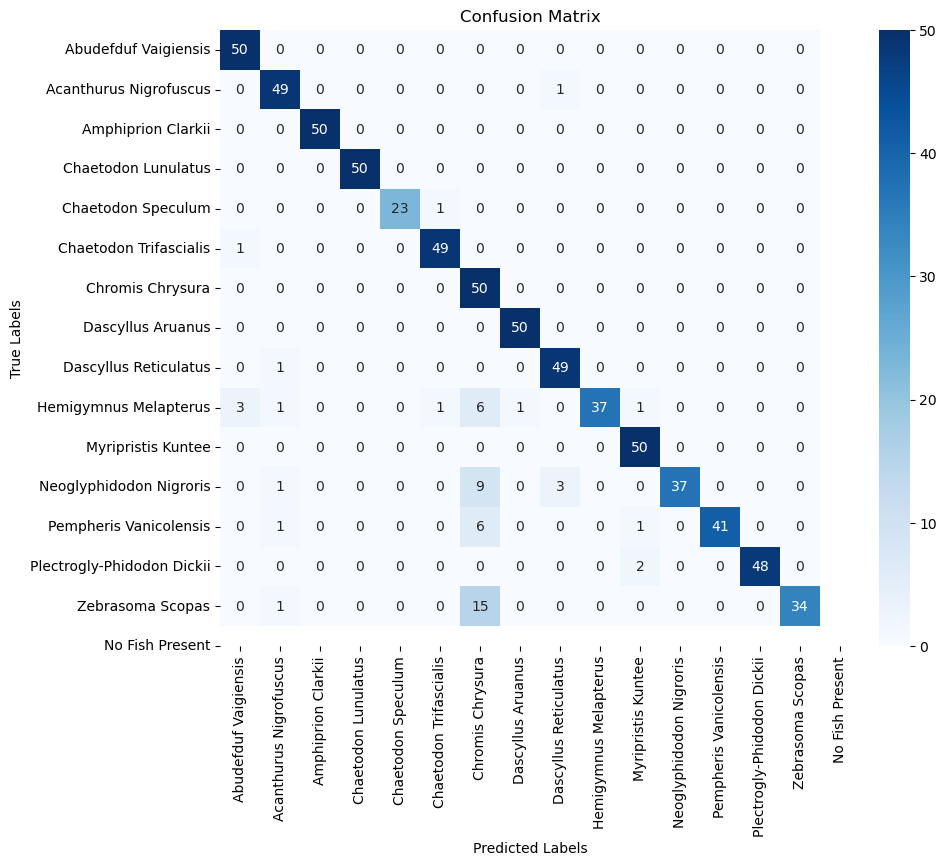

In [8]:
class_names = ["Abudefduf Vaigiensis", "Acanthurus Nigrofuscus", "Amphiprion Clarkii", 
               "Chaetodon Lunulatus", "Chaetodon Speculum", "Chaetodon Trifascialis", 
               "Chromis Chrysura", "Dascyllus Aruanus", "Dascyllus Reticulatus", 
               "Hemigymnus Melapterus", "Myripristis Kuntee", "Neoglyphidodon Nigroris", 
               "Pempheris Vanicolensis", "Plectrogly-Phidodon Dickii", "Zebrasoma Scopas", "No Fish Present"]
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [84]:
class_names = ["Abudefduf Vaigiensis", "Acanthurus Nigrofuscus", "Amphiprion Clarkii", 
               "Chaetodon Lunulatus", "Chaetodon Speculum", "Chaetodon Trifascialis", 
               "Chromis Chrysura", "Dascyllus Aruanus", "Dascyllus Reticulatus", 
               "Hemigymnus Melapterus", "Myripristis Kuntee", "Neoglyphidodon Nigroris", 
               "Pempheris Vanicolensis", "Plectrogly-Phidodon Dickii", "Zebrasoma Scopas", "No Fish Present"]

val_images_path = './dataset/images'
val_labels_path = './dataset/labels'

ground_truth_labels = []
predicted_labels = []

# Get a list of all label files
label_files = [f for f in os.listdir(val_labels_path) if f.endswith(".txt")]

# Shuffle the label files to randomly select a subset
random.shuffle(label_files)

# Select 20% of the shuffled label files
num_selected = int(len(label_files) * 0.2)
selected_files = label_files[:num_selected]

# Process the selected 20% of images and labels
for label_file in selected_files:
    # Load the corresponding image
    image_name = label_file.replace(".txt", ".jpeg")
    image_path = os.path.join(val_images_path, image_name)
    label_path = os.path.join(val_labels_path, label_file)

    # Collect all ground truth labels for this image
    with open(label_path, "r") as file:
        lines = file.readlines()
        ground_truths = [int(line.strip().split()[0]) for line in lines]  

    frame = cv2.imread(image_path)
    if frame is None:
        print(f"Could not load image {image_name}")
        continue

    # Assume `process_frame` returns detections with class names only
    processed_frame, detections = process_frame(frame)

    # Collect predicted labels for this frame
    frame_predictions = []
    if len(detections) == 0:
        # If no detections, append "No Fish Present" for each ground truth label
        frame_predictions = [class_names.index("No Fish Present")] * len(ground_truths)
    else:
        # Add predicted labels based on detections
        for detection in detections:
            pred_label = " ".join(detection[-1].split()[:-1]) 
            if pred_label in class_names:
                frame_predictions.append(class_names.index(pred_label))

        # If there are fewer predictions than ground truth labels, add "No Fish Present"
        if len(frame_predictions) < len(ground_truths):
            frame_predictions.extend([class_names.index("No Fish Present")] * (len(ground_truths) - len(frame_predictions)))
        # If there are more predictions than ground truth labels, truncate extra predictions
        else:
            frame_predictions = frame_predictions[:len(ground_truths)]

    # Append frame-based ground truths and predictions to global lists
    ground_truth_labels.extend(ground_truths)
    predicted_labels.extend(frame_predictions)


0: 256x320 2 Dascyllus Reticulatuss, 40.3ms
Speed: 3.7ms preprocess, 40.3ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Chaetodon Speculum, 31.8ms
Speed: 1.2ms preprocess, 31.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Dascyllus Aruanus, 38.6ms
Speed: 0.7ms preprocess, 38.6ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Acanthurus Nigrofuscus, 23.4ms
Speed: 1.2ms preprocess, 23.4ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Amphiprion Clarkii, 1 Dascyllus Reticulatus, 67.7ms
Speed: 0.8ms preprocess, 67.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Dascyllus Reticulatus, 31.6ms
Speed: 1.0ms preprocess, 31.6ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 1 Dascyllus Reticulatus, 29.7ms
Speed: 1.2ms preprocess, 29.7ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 3

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7634
Precision: 0.6495
Recall: 0.6428
F1 Score: 0.6455


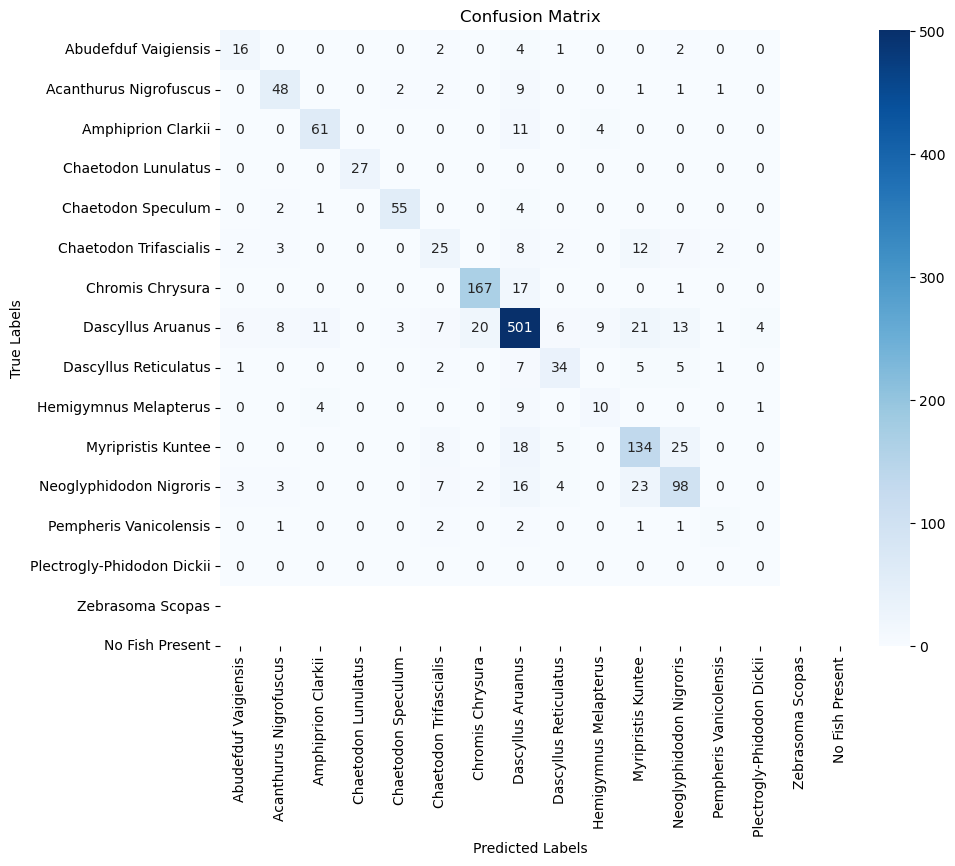

In [86]:
y_true = np.array(ground_truth_labels)
y_pred = np.array(predicted_labels)

# Check lengths of y_true and y_pred
if len(y_true) != len(y_pred):
    print("Warning: Lengths of ground truth and predicted labels do not match!")
    print(f"Length of y_true: {len(y_true)}, Length of y_pred: {len(y_pred)}")

# Calculate metrics only if lengths match
if len(y_true) == len(y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Generate and display confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Mismatch in ground truth and prediction counts. Adjust the code or dataset as necessary.")
